# Deep Learning
## HW2 - Problem 3

1.   Full Name: Amir Mohammad Yaghoobian zadeh
2.   Student Number: 401300525

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from google.colab import drive
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#part A

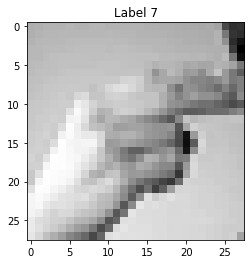

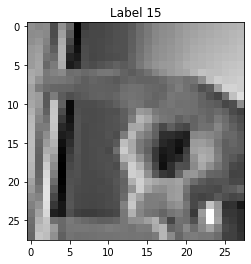

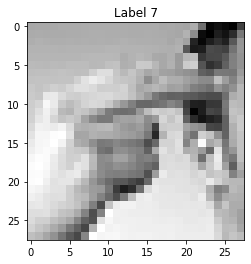

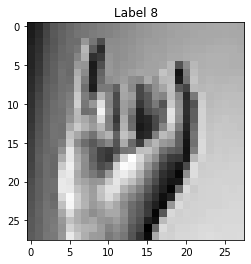

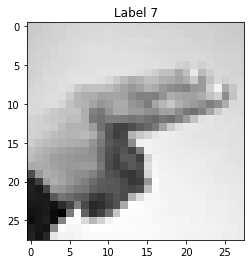

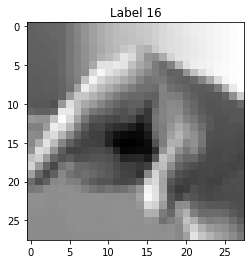

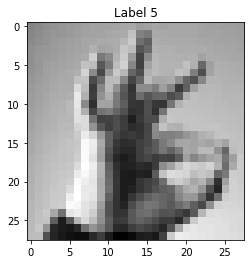

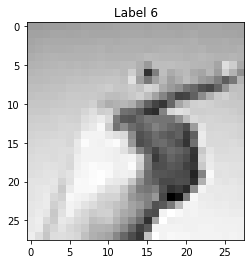

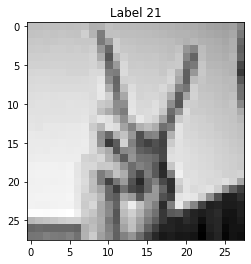

In [2]:
data_train = pd.read_csv('gdrive/MyDrive/Deep learning/HW2/Data/HW2_data/Q3_train.csv').to_numpy()
data_test = pd.read_csv('gdrive/MyDrive/Deep learning/HW2/Data/HW2_data/Q3_test.csv').to_numpy()

for _ in range(9):
  temp = np.random.randint(0,len(data_train))
  plt.imshow(data_train[temp,1:].reshape(28,28), cmap='gray')
  plt.title(f"Label {data_train[temp,0]}")
  plt.show()

#part B

In [3]:
class CustomImageDataset(Dataset):
    def __init__(self, Data, device, transform=None, target_transform=None):
        self.img_labels = Data[:, 0]
        self.img = Data[:, 1:]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.img[idx,:], dtype=torch.float32, device=device)
        label = torch.zeros((25,), device=device)
        label[self.img_labels[idx]] = 1
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


class My_NN(nn.Module):
  def __init__(self):
    super(My_NN, self).__init__()
    self.L1 = nn.Linear(28*28,800)
    self.L2 = nn.Linear(800,800)
    self.L3 = nn.Linear(800,400)
    self.L4 = nn.Linear(400,100)
    self.L5 = nn.Linear(100,25)
    
    self.act = nn.ReLU()
    self.softmax = nn.Softmax()
  
  def forward(self,x):
    x = self.act(self.L1(x))
    x = self.act(self.L2(x))
    x = self.act(self.L3(x))
    x = self.act(self.L4(x))
    out = self.softmax(self.L5(x))

    return out

def train_loop(data_loader, model, loss_func, optimizer):
  size = len(data_loader.dataset)
  num_batch = len(data_loader)

  train_loss, correct = 0, 0

  for batch ,(X,y) in enumerate(data_loader):
    pred = model(X)
    loss = loss_func(pred,y)
    train_loss += loss.item()
    correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  train_loss /= num_batch
  correct /= size
  print(f"train error:\n Accuracy: {(100*correct):>0.1f}%, Average loss: {train_loss:>8f}")
  return train_loss, 100*correct


def test_loop(data_loader, model, loss_func, val=False):
  size = len(data_loader.dataset)
  num_batch = len(data_loader)

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in data_loader:
        pred = model(X)
        test_loss += loss_func(pred,y).item()
        correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

  test_loss /= num_batch
  correct /= size
  if val==True:
    print(f"val error:\n Accuracy: {(100*correct):>0.1f}%, Average loss: {test_loss:>8f}")
  else:
    print(f"test error:\n Accuracy: {(100*correct):>0.1f}%, Average loss: {test_loss:>8f} \n")
  
  return test_loss, 100*correct



In [4]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

n = int(data_train.shape[0] * 0.1)
data_val = data_train[:n, :]
data_train = data_train[n:, :]

train_set = CustomImageDataset(data_train, device)
val_set = CustomImageDataset(data_val, device)
test_set = CustomImageDataset(data_test, device)

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=64, shuffle=True)


cuda:0


In [17]:
# SGD
learning_rate = 0.01
epochs = 50

model = My_NN().to(device)
loss_func = nn.CrossEntropyLoss(label_smoothing=0.2)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train = []
test = []
val = []

for epoch in range(epochs):
  print(f"Epoch: {epoch+1}")
  train.append(train_loop(train_dataloader, model, loss_func, optimizer))
  val.append(test_loop(val_dataloader, model, loss_func, val=True))
  test.append(test_loop(test_dataloader, model, loss_func))

train_SGD = np.asarray(train)
test_SGD = np.asarray(test)


Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


train error:
 Accuracy: 16.5%, Average loss: 3.144696
val error:
 Accuracy: 21.7%, Average loss: 3.098407
test error:
 Accuracy: 17.0%, Average loss: 3.138235 

Epoch: 2
train error:
 Accuracy: 26.7%, Average loss: 3.067111
val error:
 Accuracy: 20.8%, Average loss: 3.110608
test error:
 Accuracy: 17.7%, Average loss: 3.136263 

Epoch: 3
train error:
 Accuracy: 32.8%, Average loss: 3.019169
val error:
 Accuracy: 20.9%, Average loss: 3.108895
test error:
 Accuracy: 17.6%, Average loss: 3.132993 

Epoch: 4
train error:
 Accuracy: 38.0%, Average loss: 2.976530
val error:
 Accuracy: 25.3%, Average loss: 3.075513
test error:
 Accuracy: 19.1%, Average loss: 3.127132 

Epoch: 5
train error:
 Accuracy: 41.7%, Average loss: 2.946742
val error:
 Accuracy: 25.8%, Average loss: 3.070431
test error:
 Accuracy: 20.8%, Average loss: 3.109990 

Epoch: 6
train error:
 Accuracy: 43.4%, Average loss: 2.930368
val error:
 Accuracy: 42.7%, Average loss: 2.937043
test error:
 Accuracy: 36.7%, Average loss: 

In [18]:
# Adam
learning_rate = 0.0001
epochs = 50

model = My_NN().to(device)
loss_func = nn.CrossEntropyLoss(label_smoothing=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train = []
test = []
val = []

for epoch in range(epochs):
  print(f"Epoch: {epoch+1}")
  train.append(train_loop(train_dataloader, model, loss_func, optimizer))
  val.append(test_loop(val_dataloader, model, loss_func, val=True))
  test.append(test_loop(test_dataloader, model, loss_func))


train_adam = np.asarray(train)
test_adam = np.asarray(test)



Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


train error:
 Accuracy: 20.5%, Average loss: 3.112398
val error:
 Accuracy: 29.9%, Average loss: 3.043584
test error:
 Accuracy: 23.0%, Average loss: 3.095446 

Epoch: 2
train error:
 Accuracy: 35.7%, Average loss: 2.996234
val error:
 Accuracy: 42.7%, Average loss: 2.938021
test error:
 Accuracy: 31.1%, Average loss: 3.030138 

Epoch: 3
train error:
 Accuracy: 44.6%, Average loss: 2.924706
val error:
 Accuracy: 39.6%, Average loss: 2.962081
test error:
 Accuracy: 31.5%, Average loss: 3.024480 

Epoch: 4
train error:
 Accuracy: 50.9%, Average loss: 2.875259
val error:
 Accuracy: 56.4%, Average loss: 2.831961
test error:
 Accuracy: 43.8%, Average loss: 2.934253 

Epoch: 5
train error:
 Accuracy: 58.9%, Average loss: 2.809984
val error:
 Accuracy: 61.1%, Average loss: 2.791774
test error:
 Accuracy: 46.7%, Average loss: 2.910359 

Epoch: 6
train error:
 Accuracy: 63.1%, Average loss: 2.776162
val error:
 Accuracy: 64.0%, Average loss: 2.767218
test error:
 Accuracy: 49.2%, Average loss: 

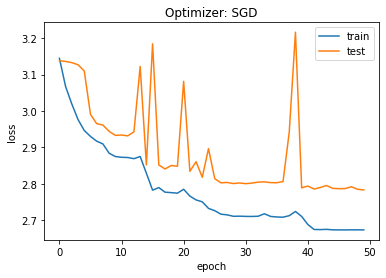

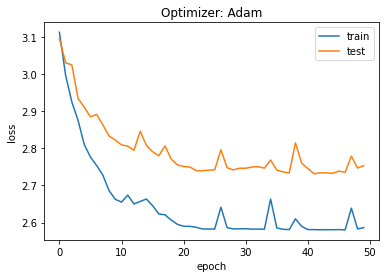

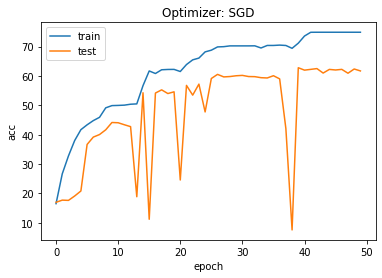

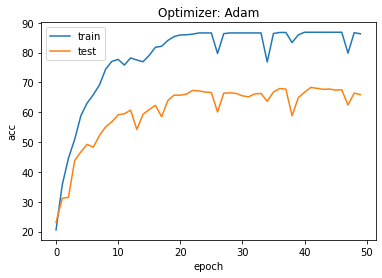

In [19]:
plt.plot(train_SGD[:,0])
plt.plot(test_SGD[:,0])
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Optimizer: SGD')
plt.show()

plt.plot(train_adam[:,0])
plt.plot(test_adam[:,0])
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Optimizer: Adam')
plt.show()

plt.plot(train_SGD[:,1])
plt.plot(test_SGD[:,1])
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Optimizer: SGD')
plt.show()

plt.plot(train_adam[:,1])
plt.plot(test_adam[:,1])
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Optimizer: Adam')
plt.show()

In [22]:
print(test_SGD[:,1].max())
print(test_adam[:,1].max())


62.78583379810374
85.7361963190184


SGD accuracy: 62.3

Adam accuracy: 68.3

The accuracy is more better in Adam compared to SGD algorithm.
Stochastic gradient descent maintains a single learning rate for all weight updates and the learning rate does not change during training. Adam combines the advantages of two other extensions of stochastic gradient descent (AdaGrad and RMSProp)

Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).
Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

references:

1) https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20a%20replacement%20optimization,sparse%20gradients%20on%20noisy%20problems.



#part C

In [21]:
# Drop out

class My_NN(nn.Module):
  def __init__(self):
    super(My_NN, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(28*28,800),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(800,800),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(800,400),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(400,100),
        nn.ReLU(),
        nn.Dropout(p=0.6),
        nn.Linear(100,25),
        nn.Softmax()
    )


  def forward(self,x):
    out = self.net(x)

    return out

# Adam
learning_rate = 0.0001
epochs = 100

model = My_NN().to(device)
loss_func = nn.CrossEntropyLoss(label_smoothing=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train = []
test = []
val = []

best_acc = 0

for epoch in range(epochs):
  print(f"Epoch: {epoch+1}")
  train.append(train_loop(train_dataloader, model, loss_func, optimizer))
  val.append(test_loop(val_dataloader, model, loss_func, val=True))
  test.append(test_loop(test_dataloader, model, loss_func))

  if test[-1][1]>best_acc:
    best_model = model

train_adam = np.asarray(train)
test_adam = np.asarray(test)


Epoch: 1


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train error:
 Accuracy: 6.4%, Average loss: 3.213562
val error:
 Accuracy: 17.8%, Average loss: 3.144433
test error:
 Accuracy: 13.3%, Average loss: 3.167222 

Epoch: 2
train error:
 Accuracy: 20.0%, Average loss: 3.115416
val error:
 Accuracy: 26.6%, Average loss: 3.066195
test error:
 Accuracy: 23.0%, Average loss: 3.093089 

Epoch: 3
train error:
 Accuracy: 29.8%, Average loss: 3.040327
val error:
 Accuracy: 35.4%, Average loss: 2.997066
test error:
 Accuracy: 29.3%, Average loss: 3.040956 

Epoch: 4
train error:
 Accuracy: 37.4%, Average loss: 2.982616
val error:
 Accuracy: 41.2%, Average loss: 2.950947
test error:
 Accuracy: 33.9%, Average loss: 3.011377 

Epoch: 5
train error:
 Accuracy: 42.9%, Average loss: 2.938054
val error:
 Accuracy: 42.8%, Average loss: 2.936896
test error:
 Accuracy: 36.4%, Average loss: 2.990890 

Epoch: 6
train error:
 Accuracy: 46.1%, Average loss: 2.912268
val error:
 Accuracy: 47.7%, Average loss: 2.900306
test error:
 Accuracy: 39.1%, Average loss: 2

#test accuracy: 85.7

dropout made the test accuracy better. but if I increase the dropout rate the learning is impossible and dont converges to a solution.

#part D

# best model architecture:
    #     nn.Sequential(
    #     nn.Linear(28*28,800),
    #     nn.ReLU(),
    #     nn.Linear(800,800),
    #     nn.ReLU(),
    #     nn.Linear(800,400),
    #     nn.ReLU(),
    #     nn.Linear(400,100),
    #     nn.ReLU(),
    #     nn.Dropout(p=0.6),
    #     nn.Linear(100,25),
    #     nn.Softmax()
    # )

# test accuracy: 85.7 %


#part H

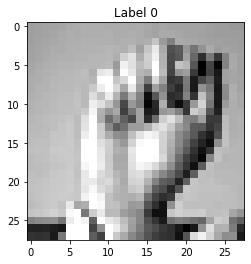

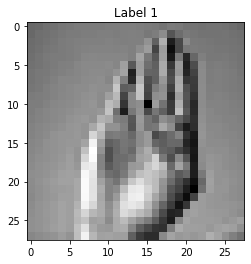

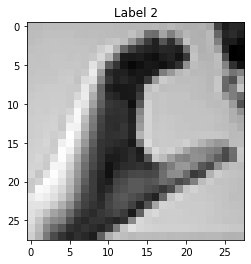

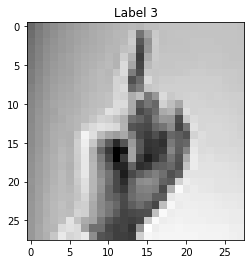

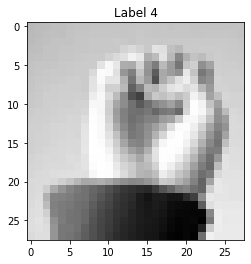

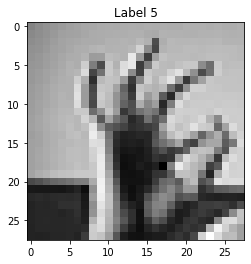

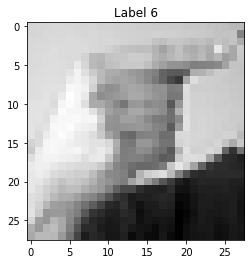

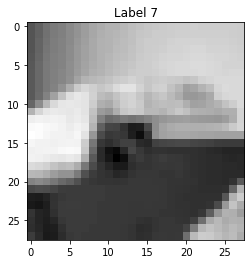

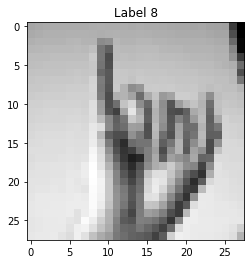

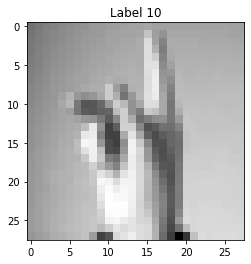

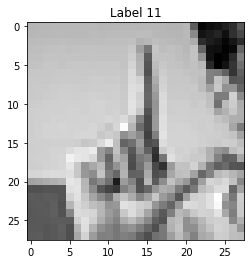

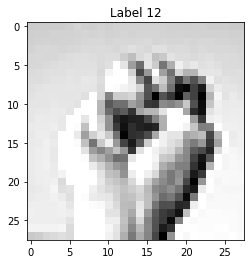

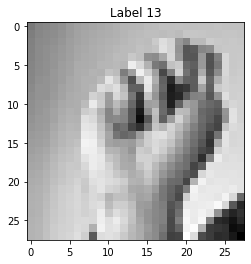

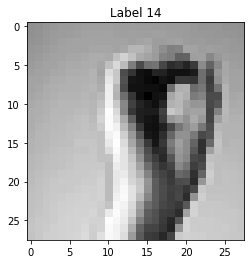

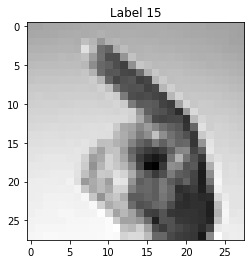

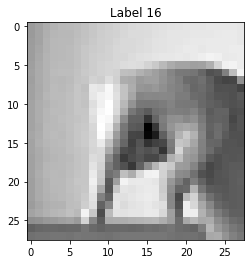

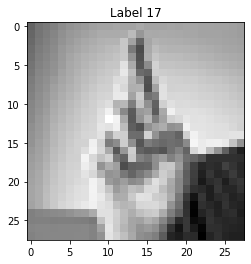

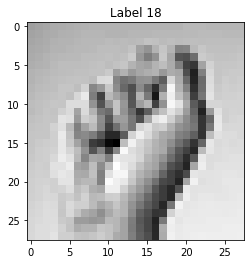

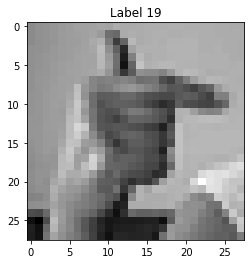

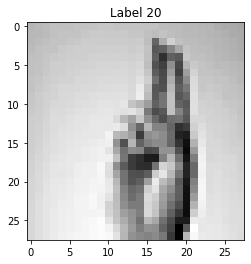

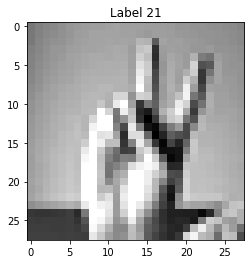

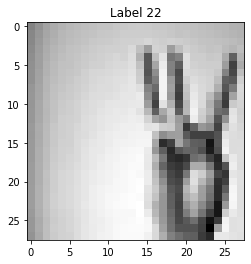

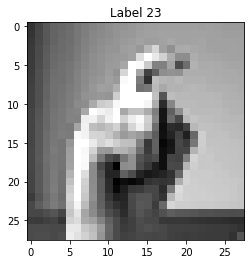

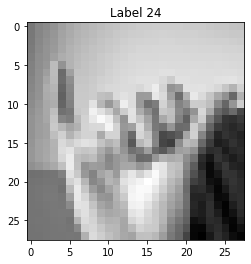

In [48]:
for i in range(25):
  temp = np.where(data_train[:,0]==i)[0]
  if temp.shape[0] > 0:
    temp = temp[0]
    plt.imshow(data_train[temp,1:].reshape(28,28), cmap='gray')
    plt.title(f"Label {data_train[temp,0]}")
    plt.show()


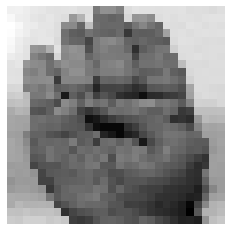

tensor([[1.2969e-37, 0.0000e+00, 0.0000e+00, 1.2344e-38, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.9869e-38, 3.7537e-16, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 1.4314e-39, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4856e-27,
         1.0930e-43]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
16


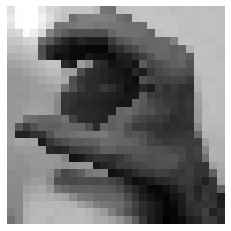

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 6.7957e-14, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4462e-35, 8.2957e-43, 0.0000e+00,
         0.0000e+00]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
15


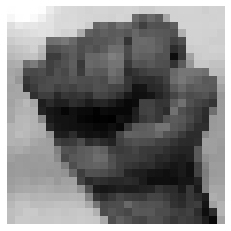

tensor([[2.2419e-20, 0.0000e+00, 4.6687e-40, 1.4882e-29, 7.4672e-38, 3.5924e-27,
         1.0141e-39, 0.0000e+00, 9.9315e-31, 0.0000e+00, 9.6474e-34, 0.0000e+00,
         4.7423e-14, 8.6463e-35, 2.0092e-37, 8.3148e-18, 1.0000e+00, 1.3466e-42,
         3.3270e-20, 2.5863e-39, 1.9645e-38, 8.5148e-37, 2.3822e-44, 9.8159e-34,
         1.1484e-40]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
16


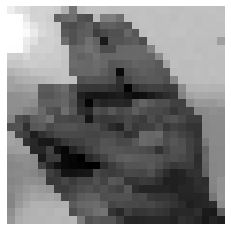

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.9143e-40,
         2.4195e-39, 0.0000e+00, 2.8026e-45, 0.0000e+00, 1.9886e-36, 0.0000e+00,
         9.1084e-44, 5.9387e-42, 6.8123e-39, 9.9924e-01, 7.6005e-04, 0.0000e+00,
         0.0000e+00, 4.2039e-45, 2.5602e-42, 8.2817e-43, 0.0000e+00, 0.0000e+00,
         0.0000e+00]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
16


In [72]:
import cv2

img = cv2.resize(cv2.imread('gdrive/MyDrive/Deep learning/HW2/label1.jpg',0), dsize=(28, 28))

plt.imshow(img,'gray')
plt.axis("off")
plt.show()
img = torch.tensor(img, dtype=torch.float32).to(device).reshape(1,-1)

print(best_model(img))
print(best_model(img).argmax().item())

img = cv2.resize(cv2.imread('gdrive/MyDrive/Deep learning/HW2/label2.jpg',0), dsize=(28, 28))

plt.imshow(img,'gray')
plt.axis("off")
plt.show()
img = torch.tensor(img, dtype=torch.float32).to(device).reshape(1,-1)

print(best_model(img))
print(best_model(img).argmax().item())

img = cv2.resize(cv2.imread('gdrive/MyDrive/Deep learning/HW2/label12.jpg',0), dsize=(28, 28))

plt.imshow(img,'gray')
plt.axis("off")
plt.show()
img = torch.tensor(img, dtype=torch.float32).to(device).reshape(1,-1)

print(best_model(img))
print(best_model(img).argmax().item())

img = cv2.resize(cv2.imread('gdrive/MyDrive/Deep learning/HW2/label20.jpg',0), dsize=(28, 28))

plt.imshow(img,'gray')
plt.axis("off")
plt.show()
img = torch.tensor(img, dtype=torch.float32).to(device).reshape(1,-1)

print(best_model(img))
print(best_model(img).argmax().item())
